In [183]:
# importing libraries
import numpy as n
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [184]:
# load data into dataframe Train
train = pd.read_csv("data.csv")

In [185]:
# check shape of dataframe
train.shape

(99999, 27)

In [186]:
# check datatypes of dataframe
train.dtypes

click                 bool
C1                   int64
banner_pos           int64
site_id             object
site_domain         object
site_category       object
app_id              object
app_domain          object
app_category        object
device_id           object
device_ip           object
device_model        object
device_type          int64
device_conn_type     int64
C14                  int64
C15                  int64
C16                  int64
C17                  int64
C18                  int64
C19                  int64
C20                  int64
C21                  int64
month                int64
dayofweek            int64
day                  int64
hour                 int64
y                    int64
dtype: object

In [200]:
# Checking for outlier. This data does not contain outliers
train.describe()

,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y
count,99999.000000,99999.000000,99999.00000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.0,99999.000000,99999.000000,99999.000000,99999.000000
mean,1004.967550,0.289943,1.01639,0.329453,18857.231732,318.834548,60.278743,2114.613036,1.439904,227.234932,53292.001950,83.163542,10.0,2.592836,25.485755,11.300673,0.169802
std,1.091916,0.505707,0.53110,0.854673,4944.919482,21.510752,47.713436,607.469442,1.326824,351.472366,49952.340367,70.161076,0.0,1.723003,2.968520,5.938725,0.375460
min,1001.000000,0.000000,0.00000,0.000000,375.000000,120.000000,20.000000,112.000000,0.000000,33.000000,-1.000000,1.000000,10.0,0.000000,21.000000,0.000000,0.000000
25%,1005.000000,0.000000,1.00000,0.000000,16920.000000,320.000000,50.000000,1863.000000,0.000000,35.000000,-1.000000,23.000000,10.0,1.000000,23.000000,7.000000,0.000000
50%,1005.000000,0.000000,1.00000,0.000000,20346.000000,320.000000,50.000000,2323.000000,2.000000,39.000000,100050.000000,61.000000,10.0,2.000000,26.000000,11.000000,0.000000
75%,1005.000000,1.000000,1.00000,0.000000,21893.000000,320.000000,50.000000,2526.000000,3.000000,171.000000,100093.000000,101.000000,10.0,4.000000,28.000000,16.000000,0.000000
max,1012.000000,7.000000,5.00000,5.000000,24043.000000,1024.000000,1024.000000,2757.000000,3.000000,1839.000000,100248.000000,255.000000,10.0,6.000000,30.000000,23.000000,1.000000


In [187]:
# check count of clicks
train['click'].value_counts()

False    83019
True     16980
Name: click, dtype: int64

In [188]:
# check for null data. We did find any null records in dataframe
train.isnull().sum()

click               0
C1                  0
banner_pos          0
site_id             0
site_domain         0
site_category       0
app_id              0
app_domain          0
app_category        0
device_id           0
device_ip           0
device_model        0
device_type         0
device_conn_type    0
C14                 0
C15                 0
C16                 0
C17                 0
C18                 0
C19                 0
C20                 0
C21                 0
month               0
dayofweek           0
day                 0
hour                0
y                   0
dtype: int64

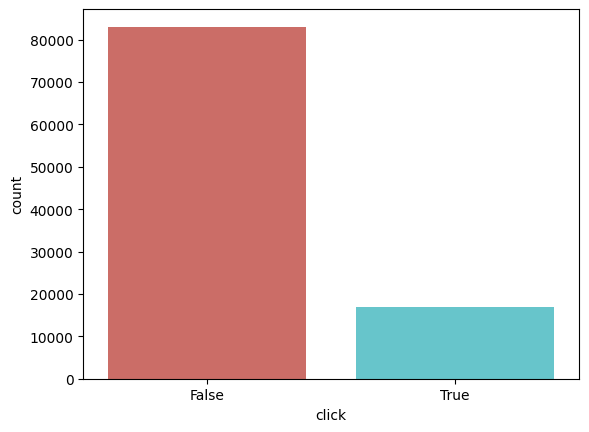

In [49]:
# plot a graph for click
sns.countplot(x='click',data=train, palette='hls')
plt.show();

In [50]:
# check click through rate. approx 83% did not click and 17% clicked
train['click'].value_counts()/len(train)

False    0.830198
True     0.169802
Name: click, dtype: float64

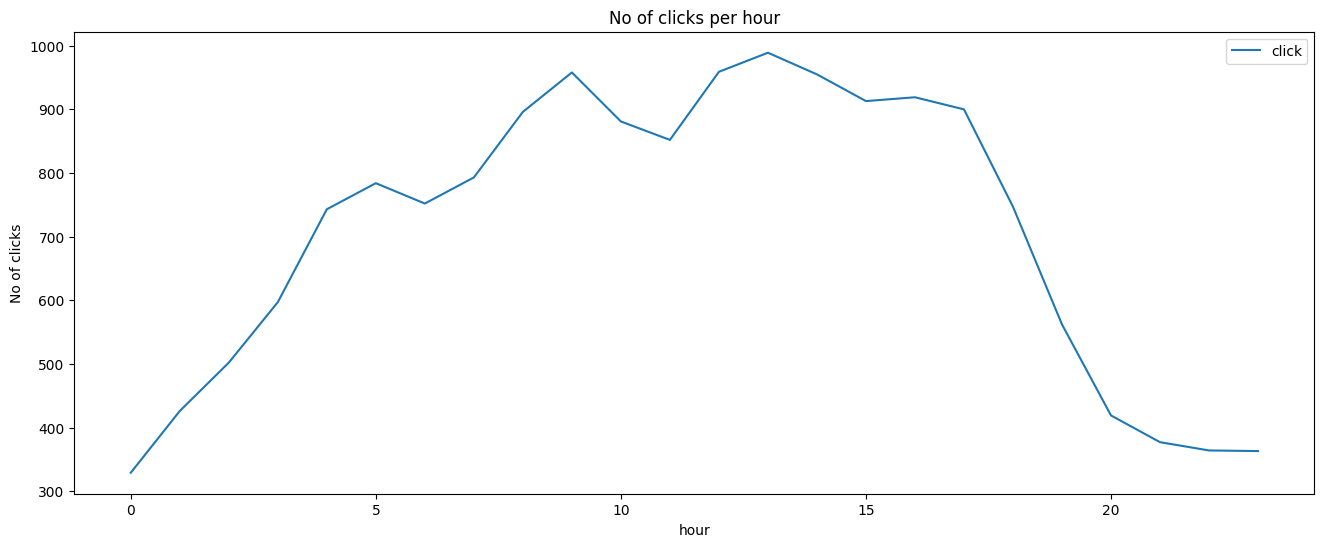

In [51]:
# plot graph for no of clicks per hour. we see peak hours are at 9 and 13
train.groupby('hour').agg({'click':'sum'}).plot(figsize=(16,6))
plt.ylabel('No of clicks')
plt.title('No of clicks per hour');

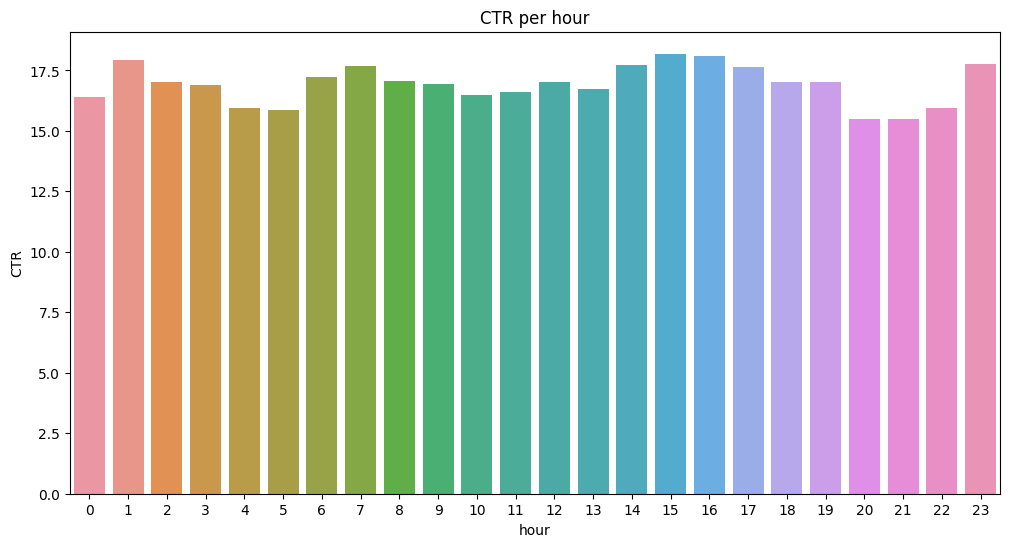

In [62]:
# CTR per hour
df_click = train[train['click'] == 1]
df_hour = train[['hour','click']].groupby(['hour']).count().reset_index()
df_hour = df_hour.rename(columns={'click': 'impressions'})
df_hour['clicks'] = df_click[['hour','click']].groupby(['hour']).count().reset_index()['click']
df_hour['CTR'] = df_hour['clicks']/df_hour['impressions']*100

plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='hour', data=df_hour)
plt.title('CTR per hour');

In [95]:
# analysis on banner position
print(train.banner_pos.value_counts()/len(train))

0    0.717787
1    0.280523
7    0.001070
2    0.000300
4    0.000190
5    0.000090
3    0.000040
Name: banner_pos, dtype: float64


In [189]:
# Analysis on C1 feature. C1 value = 1005 has 92% data
print(train.C1.value_counts()/len(train))

1005    0.918629
1002    0.054941
1010    0.022660
1012    0.002540
1007    0.000930
1001    0.000210
1008    0.000090
Name: C1, dtype: float64


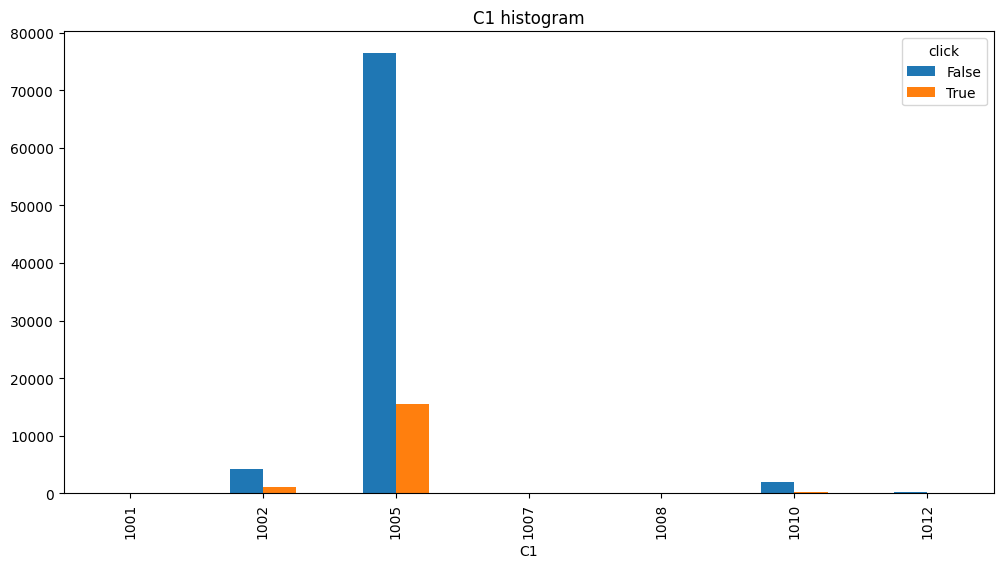

In [192]:
train.groupby(['C1', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='C1 histogram');

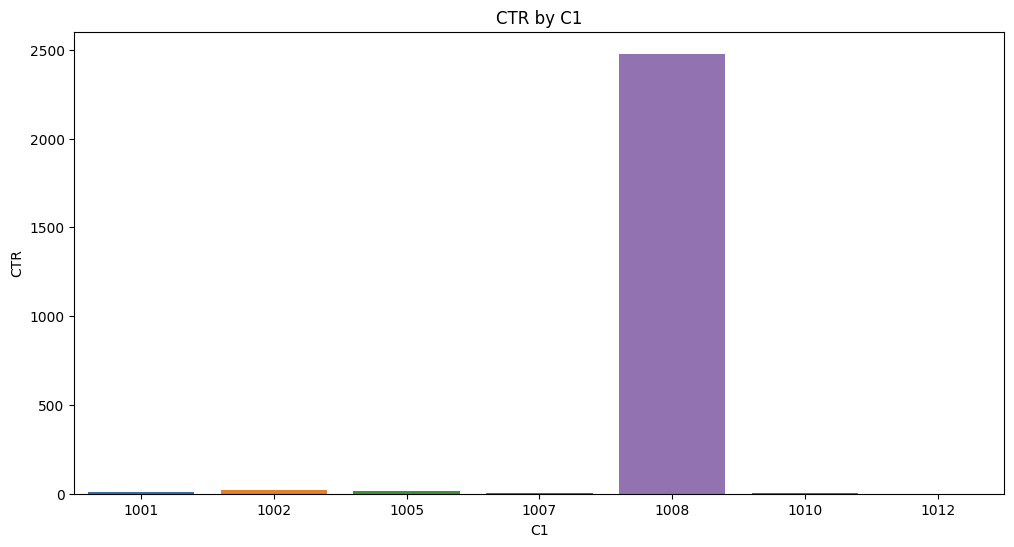

In [194]:
# CTR by C1. 1008 has the highest CTR
df_c1 = train[['C1','click']].groupby(['C1']).count().reset_index()
df_c1 = df_c1.rename(columns={'click': 'impressions'})
df_c1['clicks'] = df_click[['C1','click']].groupby(['C1']).count().reset_index()['click']
df_c1['CTR'] = df_c1['clicks']/df_c1['impressions']*100
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='C1', data=df_c1)
plt.title('CTR by C1');

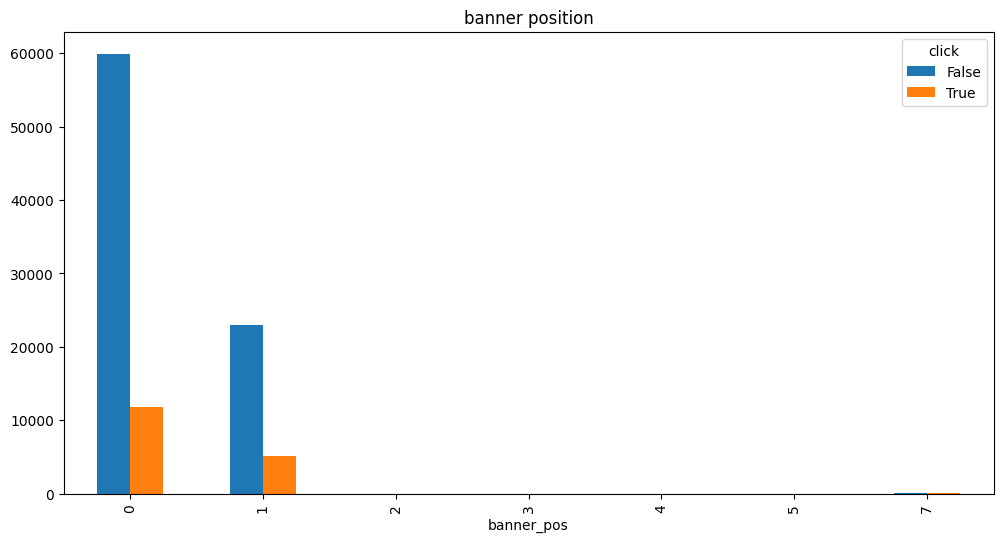

In [98]:
# plot click viz-a-viz banner position. we see that only two banner position i.e. 0 and 1 are significant
train.groupby(['banner_pos', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='banner position');

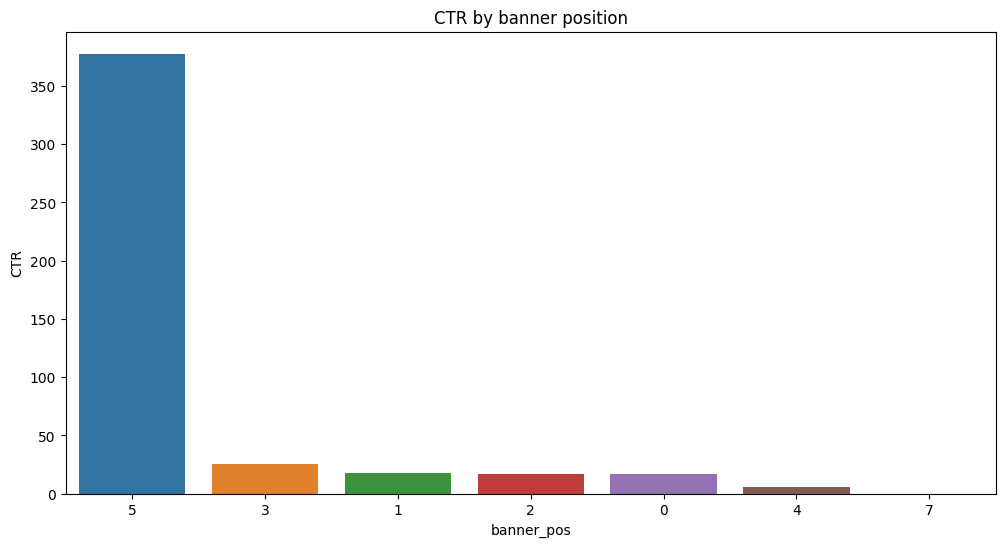

In [100]:
# if we check CTR for every banner position, we see that position 5 has highest CTR
df_banner = train[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()
df_banner = df_banner.rename(columns={'click': 'impressions'})
df_banner['clicks'] = df_click[['banner_pos','click']].groupby(['banner_pos']).count().reset_index()['click']
df_banner['CTR'] = df_banner['clicks']/df_banner['impressions']*100
sort_banners = df_banner.sort_values(by='CTR',ascending=False)['banner_pos'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='banner_pos', data=df_banner, order=sort_banners)
plt.title('CTR by banner position');

In [196]:
# Handling categorical variable banner
banner_pos = train.banner_pos.unique()
banner_pos.sort()
ctr_avg_list=[]
for i in banner_pos:
    ctr_avg=train.loc[n.where((train.banner_pos == i))].click.mean()
    ctr_avg_list.append(ctr_avg)
    print("for banner position: {},  click through rate: {}".format(i,ctr_avg))

for banner position: 0,  click through rate: 0.16530134581626682
for banner position: 1,  click through rate: 0.1808783687437616
for banner position: 2,  click through rate: 0.16666666666666666
for banner position: 3,  click through rate: 0.25
for banner position: 4,  click through rate: 0.05263157894736842
for banner position: 5,  click through rate: 0.0
for banner position: 7,  click through rate: 0.3177570093457944


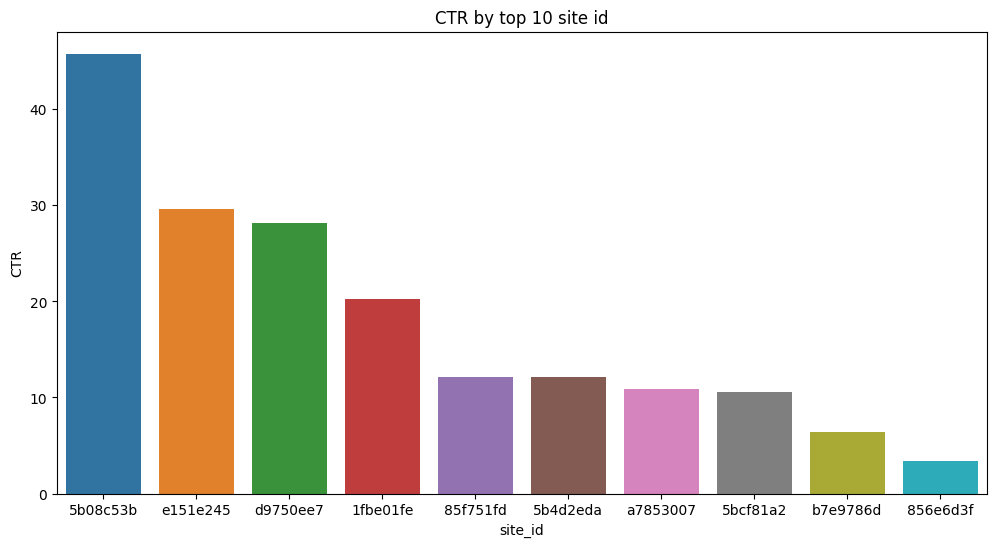

In [104]:
# plot a graph to check which site has most clicks
top10_ids = (train.site_id.value_counts()/len(train))[0:10].index
top10_sites = train[(train.site_id.isin((train.site_id.value_counts()/len(train))[0:10].index))]
top10_sites_click = top10_sites[top10_sites['click'] == 1]
df_site = top10_sites[['site_id','click']].groupby(['site_id']).count().reset_index()
df_site = df_site.rename(columns={'click': 'impressions'})
df_site['clicks'] = top10_sites_click[['site_id','click']].groupby(['site_id']).count().reset_index()['click']
df_site['CTR'] = df_site['clicks']/df_site['impressions']*100
sort_site = df_site.sort_values(by='CTR',ascending=False)['site_id'].tolist()
plt.figure(figsize=(12,6))
sns.barplot(y='CTR', x='site_id', data=df_site, order=sort_site)
plt.title('CTR by top 10 site id');

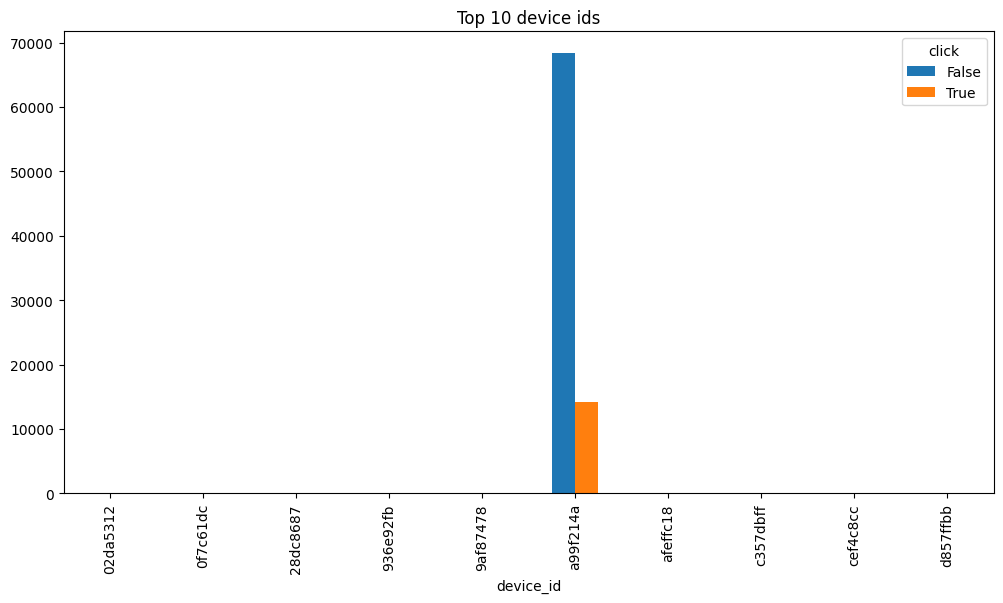

In [107]:
# plot graph to check which device id has highest clicks
top10_devices = (train.device_id.value_counts()/len(train))[0:10].index
top10_device = train[(train.device_id.isin((train.device_id.value_counts()/len(train))[0:10].index))]
top10_device_click = top10_device[top10_device['click'] == 1]
top10_device.groupby(['device_id', 'click']).size().unstack().plot(kind='bar', figsize=(12,6), title='Top 10 device ids');


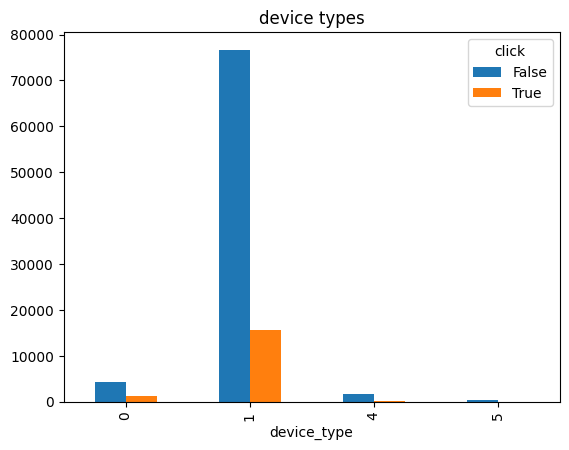

In [108]:
# plot a graph to check which device type has highest clicks
train[['device_type','click']].groupby(['device_type','click']).size().unstack().plot(kind='bar', title='device types');

<AxesSubplot: title={'center': 'App Category v/s Clicks'}>

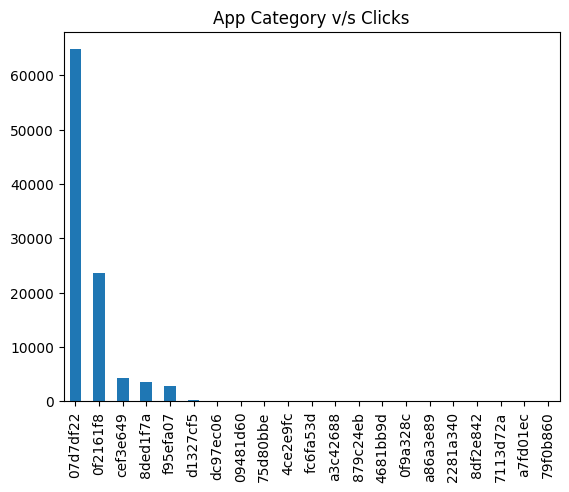

In [110]:
# plot a graph to check which app category has highest clicks
train['app_category'].value_counts().plot(kind='bar', title='App Category v/s Clicks')

In [131]:
# converting string objects to int
def convert_obj_to_int(self):
    
    object_list_columns = self.columns
    object_list_dtypes = self.dtypes
    new_col_suffix = '_int'
    for index in range(0,len(object_list_columns)):
        if object_list_dtypes[index] == object :
            self[object_list_columns[index]+new_col_suffix] = self[object_list_columns[index]].map( lambda  x: hash(x))
            self.drop([object_list_columns[index]],inplace=True,axis=1)
    return self
train = convert_obj_to_int(train)

In [135]:
# check data
train.head()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
0,False,1005,1,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0,3075307694198035365,1861193654337870557,-6915717319441148897,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,482221966663126695,3074751402855360802
1,True,1005,1,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1,-5022919056208860677,-594788692819865169,-6915717319441148897,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,8183603980356555690,-1863636449658482260
2,False,1005,0,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0,-1678318421740691575,4447774775091070140,-8110213508317798196,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,-8310259239477355411,-8563262163246727550
3,False,1002,0,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0,743465088305934166,-4065548505988974522,2038689520308739355,-2988284885443216664,-8311479273601922952,801527903978837448,-3836529412241954253,6470480497189863581,7028077244913644214
4,True,1005,0,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1,7385191861654641905,-290114488331314108,-8110213508317798196,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,-2791448053746849245,5575818758528458258


In [132]:
# to show all columns in dataframe
pd.set_option('display.max_columns', None)
train.head()

,click,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,month,dayofweek,day,hour,y,site_id_int,site_domain_int,site_category_int,app_id_int,app_domain_int,app_category_int,device_id_int,device_ip_int,device_model_int
0,False,1005,1,1,0,22683,320,50,2528,0,39,100075,221,10,1,28,14,0,3075307694198035365,1861193654337870557,-6915717319441148897,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,482221966663126695,3074751402855360802
1,True,1005,1,1,0,17037,320,50,1934,2,39,-1,16,10,2,22,19,1,-5022919056208860677,-594788692819865169,-6915717319441148897,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,8183603980356555690,-1863636449658482260
2,False,1005,0,1,0,22155,320,50,2552,3,167,100202,23,10,3,23,18,0,-1678318421740691575,4447774775091070140,-8110213508317798196,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,-8310259239477355411,-8563262163246727550
3,False,1002,0,0,0,21591,320,50,2478,3,167,100074,23,10,2,22,19,0,743465088305934166,-4065548505988974522,2038689520308739355,-2988284885443216664,-8311479273601922952,801527903978837448,-3836529412241954253,6470480497189863581,7028077244913644214
4,True,1005,0,1,0,15708,320,50,1722,0,35,-1,79,10,1,21,8,1,7385191861654641905,-290114488331314108,-8110213508317798196,-2988284885443216664,-8311479273601922952,801527903978837448,1941006466887517626,-2791448053746849245,5575818758528458258


# Performing logistics regression
# It is used to find the probability of success and failure when the dependent variable is binary. It is very much easier to set up and train

In [152]:
# Split the data into a training and test set. 
# All columns are features execpt for y
X = train.loc[:, ['click', 'C1', 'banner_pos', 'site_id_int', 'site_domain_int', 'site_category_int',
       'app_id_int', 'app_domain_int', 'app_category_int', 'device_id_int',
       'device_ip_int', 'device_model_int', 'device_type', 'device_conn_type',
       'C14', 'C15', 'C16', 'C17','C18','C19','C20','C21',
       'month', 'dayofweek', 'day', 'hour']]


In [138]:
# y is the target variable
y = train.loc[:, ['y']]

In [139]:
#import a prebuilt function to split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69999, 26)
(69999, 1)
(30000, 26)
(30000, 1)


In [142]:
# Fit your training data to a Logistic Regression Model
from sklearn.linear_model import LogisticRegression

# diclare the logistic model
model = LogisticRegression()

# train the model on the data
model.fit(X_train, y_train)

LogisticRegression()

In [146]:
# Use the testing data to make predictions and determine the accuracy of your predictions.
y_pred = model.predict(X_test)

from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(metrics.accuracy_score(y_test, y_pred))

# print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

0.8293333333333334
[[24880     0]
 [ 5120     0]]


In [147]:
# Calculating a base line for comparing the model. 
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [149]:
y_pred = dummy_clf.predict(X_test)

# print confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

[[24880     0]
 [ 5120     0]]


In [150]:
# plot ROC score
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

0.5

# Performing Random Forest
# Used due to its readability and interpretability. It has less chances of overfitting

In [153]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train,y_train)
baseline_acc = dummy_classifier.score(X_test,y_test)


### For verifying answer:
print("Baseline Accuracy = ", baseline_acc)

Baseline Accuracy =  0.8293333333333334


In [154]:
def create_bootstrap_sample(df):
    return df.sample(n= train.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   69999
Number of rows in bootstrap: 99999
       click    C1  banner_pos          site_id_int      site_domain_int  \
41897  False  1005           1  7948341220196904998  -656785535332648868   
79717  False  1005           0  6944502980350002282 -2407596579750517917   
6403   False  1005           0  6944502980350002282 -2407596579750517917   
87298  False  1005           0  6944502980350002282 -2407596579750517917   
41651  False  1002           0  4774874318040680060 -3208525941202133479   
...      ...   ...         ...                  ...                  ...   
28441  False  1005           1   110812941260505783  3169282257702676643   
43882  False  1005           0  7385191861654641905  -290114488331314108   
12232  False  1005           0  6944502980350002282 -2407596579750517917   
48131  False  1002           0  2218740301531332533  -172800675871708821   
25504  False  1005           0  6944502980350002282 -240759

In [155]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=10, max_features=7, random_state=42)
model_rf.fit(X_train, y_train)
predict_rf = model_rf.predict(X_test)
recall_rf = recall_score(y_test, predict_rf)
precision_rf = precision_score(y_test, predict_rf)

In [156]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)
print('Classification Report:\n')
print(classification_report(y_test, predict_rf))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24880
           1       1.00      1.00      1.00      5120

    accuracy                           1.00     30000
   macro avg       1.00      1.00      1.00     30000
weighted avg       1.00      1.00      1.00     30000



In [170]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = n.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", n.round(n.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", n.round(n.array(scores).std(), 5))
    print("Range:\t\t\t\t", n.round(n.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {n.round(recall_score(y_test, ensemble_preds), 5)}')

In [171]:
def print_recall_scores(ensemble, feats, true_labels):
    '''
    Prints the recall scores for base estimators in a sklearn ensemble model.
    '''
    scores = []
    for model_idx, model in enumerate(ensemble.estimators_):
        if model_idx == 0:
            print('='*40)
        preds = model.predict(feats)
        scores.append(recall_score(true_labels, preds))
        model_recall = n.round(recall_score(true_labels, preds), 5)
        print(f'Recall for Base Model {model_idx+1}:\t', model_recall)
        if model_idx < (len(ensemble.estimators_) - 1):
            print('-'*40)
        else:
            print('='*40)
    ensemble_preds = ensemble.predict(feats)
    print("Mean Recall Score:\t\t", n.round(n.array(scores).mean(), 5))
    print("Std Deviation:\t\t\t", n.round(n.array(scores).std(), 5))
    print("Range:\t\t\t\t", n.round(n.array(scores).ptp(), 5))
    print(f'Overall Recall for model:\t {n.round(recall_score(y_test, ensemble_preds), 5)}')

In [172]:
print_recall_scores(model_rf, X_test, y_test)

Recall for Base Model 1:	 0.9959
----------------------------------------
Recall for Base Model 2:	 0.97793
----------------------------------------
Recall for Base Model 3:	 0.99062
----------------------------------------
Recall for Base Model 4:	 0.98926
----------------------------------------
Recall for Base Model 5:	 0.99023
----------------------------------------
Recall for Base Model 6:	 0.98906
----------------------------------------
Recall for Base Model 7:	 0.98105
----------------------------------------
Recall for Base Model 8:	 0.99609
----------------------------------------
Recall for Base Model 9:	 1.0
----------------------------------------
Recall for Base Model 10:	 0.98535
Mean Recall Score:		 0.98955
Std Deviation:			 0.00647
Range:				 0.02207
Overall Recall for model:	 1.0


In [173]:
from sklearn.ensemble import RandomForestClassifier

model_rf_oob = RandomForestClassifier(n_estimators=100, max_features=7, oob_score=True, random_state=42).fit(X_train, y_train)
oob_score = round(model_rf_oob.oob_score_,4)
acc_oob = round(accuracy_score(y_test, model_rf_oob.predict(X_test)),4)
diff_oob = round(abs(oob_score - acc_oob),4)

print('OOB Score:\t\t\t', oob_score)
print('Testing Accuracy:\t\t', acc_oob)
print('Acc. Difference:\t\t', diff_oob)

OOB Score:			 1.0
Testing Accuracy:		 1.0
Acc. Difference:		 0.0


In [174]:
#Feature Importance. We notice that click has the highest feature importance
feature_importances = model_rf.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest
print(df)

<bound method DataFrame.nlargest of              features  importance
0               click    0.938201
1                  C1    0.000717
2          banner_pos    0.000698
3         site_id_int    0.003501
4     site_domain_int    0.006081
5   site_category_int    0.003268
6          app_id_int    0.001332
7      app_domain_int    0.000619
8    app_category_int    0.003522
9       device_id_int    0.000801
10      device_ip_int    0.003506
11   device_model_int    0.003043
12        device_type    0.000891
13   device_conn_type    0.000350
14                C14    0.003576
15                C15    0.004324
16                C16    0.008605
17                C17    0.001558
18                C18    0.001769
19                C19    0.002341
20                C20    0.002215
21                C21    0.004575
22              month    0.000000
23          dayofweek    0.000725
24                day    0.001298
25               hour    0.002484>


# Performing boosting
# It reduces variance and bias. Algorithm work on combining weak learners into strong learners

In [175]:
def create_bootstrap_sample(df):
    return df.sample(n= df.shape[0], replace = True)

bootstrap_sample = create_bootstrap_sample(X_train)

print('Number of rows should be the same:')
print('Number of rows in X_train:  ', X_train.shape[0])
print('Number of rows in bootstrap:', create_bootstrap_sample(X_train).shape[0])

print(bootstrap_sample)

Number of rows should be the same:
Number of rows in X_train:   69999
Number of rows in bootstrap: 69999
       click    C1  banner_pos          site_id_int      site_domain_int  \
60093  False  1005           1 -5022919056208860677  -594788692819865169   
87419  False  1005           0 -8060275734124847045  4089656489094689671   
1233   False  1005           0  9147767515322266636  9128701133645079132   
38678  False  1005           0  7385191861654641905  -290114488331314108   
17479  False  1005           0  6944502980350002282 -2407596579750517917   
...      ...   ...         ...                  ...                  ...   
81739  False  1005           0 -7342798662536520052  6101941153415971416   
66877  False  1005           0  8386248549943018603  7880087685972974451   
35884  False  1002           0  8518863170437739514 -9162785579896875582   
12394  False  1005           0  6944502980350002282 -2407596579750517917   
60738  False  1005           0  7385191861654641905  -29011

In [176]:
from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score
)

In [177]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
base_est = DecisionTreeClassifier (max_depth =2)
ada_boost1 = AdaBoostClassifier(base_est, n_estimators=500, random_state=42, learning_rate=.05)
ada_boost1.fit(X_train, y_train)
ada_boost2 = AdaBoostClassifier(base_est, n_estimators=20, random_state=42, learning_rate=.5)
ada_boost2.fit(X_train, y_train)
res1 = round(recall_score(y_test, ada_boost1.predict(X_test)),4)
res2 = round(recall_score(y_test, ada_boost2.predict(X_test)),4)

print('Winning Model:\t {}, MODEL 1')
print('MODEL 1 Recall:\t {}'.format(res1))
print('MODEL 2 Recall:\t {}:'.format(res2))

Winning Model:	 {}, MODEL 1
MODEL 1 Recall:	 1.0
MODEL 2 Recall:	 1.0:


In [180]:
#Gradient Boosted Trees (GBT)
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)
recall_gbc = round(recall_score(y_test, gbc_pred),4)
precision_gbc = round(precision_score(y_test, gbc_pred),4)

print('Recall :\t {}'.format(recall_gbc))
print('Precision :\t {}:'.format(precision_gbc))

Recall :	 1.0
Precision :	 1.0:


In [181]:
#Feature Importance. Again click has the highest feature importance
feature_importances = gbc.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest

In [182]:
df

<bound method DataFrame.nlargest of              features    importance
0               click  1.000000e+00
1                  C1  0.000000e+00
2          banner_pos  0.000000e+00
3         site_id_int  4.024765e-14
4     site_domain_int  0.000000e+00
5   site_category_int  0.000000e+00
6          app_id_int  0.000000e+00
7      app_domain_int  0.000000e+00
8    app_category_int  0.000000e+00
9       device_id_int  1.021286e-14
10      device_ip_int  6.694704e-13
11   device_model_int  1.971628e-16
12        device_type  0.000000e+00
13   device_conn_type  0.000000e+00
14                C14  3.858710e-16
15                C15  0.000000e+00
16                C16  0.000000e+00
17                C17  0.000000e+00
18                C18  0.000000e+00
19                C19  0.000000e+00
20                C20  0.000000e+00
21                C21  0.000000e+00
22              month  0.000000e+00
23          dayofweek  0.000000e+00
24                day  0.000000e+00
25               hour  0.000